### Install Libraries and Import Dependencies

In [1]:
#!pip install google_trans_new
#!pip install googletrans==4.0.0rc1
#!pip install googletrans-temp
#!pip install translate
#!pip install googletrans

import pandas as pd
import json
import os
from pprint import pprint
import googletrans
from googletrans import Translator
from googletrans import LANGUAGES
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

# Hide warning messages in notebook
import warnings
warnings.filterwarnings("ignore")

### Read Russia Videos CSV file

In [2]:
# read from an excel file
csv_file = "../Data/CSVs/RUvideos.csv"

ru_df = pd.read_csv(csv_file, sep=',', encoding='utf-8-sig')

ru_df.head(5)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 364767: invalid continuation byte

## Removing Unnecessary Columns from Russia Videos df

In [32]:
ru_df = ru_df.drop(['video_id','thumbnail_link','ratings_disabled','video_error_or_removed','description'], axis=1)
ru_df.head()

,Unnamed: 0,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled
0,0,17.14.11,Захар и Полина учатся экономить,Т—Ж БОГАЧ,22,2017-11-13T09:09:31.000Z,"захар и полина|""учимся экономить""|""копить день...",62408,334,190,50,False
1,1,17.14.11,Биржа Мемов #29. Большой выпуск,Druzhko Show,22,2017-11-13T17:32:11.000Z,"биржа мемов|""лев шагинян""|""мемы""|""пикчи""|""друж...",330043,43841,2244,2977,False
2,2,17.14.11,ХАЙП КЭМП - СВОЙ СРЕДИ ЧУЖИХ,Юлик,24,2017-11-13T16:11:31.000Z,"юмор|""комедия""|""влог""|""блог""|""смешно""|""смешное...",424596,49854,714,2944,False
3,3,17.14.11,Сочная кесадилья с курицей,Hochland,22,2017-11-13T06:51:10.000Z,"хохланд|""сыр""|""рецепты""|""как приготовить""|""вку...",112851,3566,122,80,False
4,4,17.14.11,КЛИПЫ РОДИТЕЛЕЙ НА ШКОЛЬНЫЙ ВЫПУСКНОЙ,Совергон,24,2017-11-13T16:52:36.000Z,"Совергон|""Sovergon""|""клипы""|""родители""|""школа""...",243469,36216,631,1692,False


### Join Path and Load Russia Category ID JSON file in to Python Dictionary

In [33]:
filepath = os.path.join("Data", "RU_category_id.json")
with open(filepath) as jsonfile:
    video_json = json.load(jsonfile)
pprint(video_json)

{'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2qTj13hkQZk"',
 'items': [{'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
            'id': '1',
            'kind': 'youtube#videoCategory',
            'snippet': {'assignable': True,
                        'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
                        'title': 'Film & Animation'}},
           {'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
            'id': '2',
            'kind': 'youtube#videoCategory',
            'snippet': {'assignable': True,
                        'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
                        'title': 'Autos & Vehicles'}},
           {'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
            'id': '10',
            'kind': 'youtube#videoCategory',
            'snippet': {'assignable': True,
                        'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
                        'title': 'Music'}},
 

### Retrieve the item and id info from JSON array

In [34]:
data = video_json['items']
ids = data[2]['id']

snippet = data[0]['snippet']['title']
#titles = snippet['title']

print(snippet)

Film & Animation


In [35]:
data = video_json['items']
pprint(data)

[{'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
  'id': '1',
  'kind': 'youtube#videoCategory',
  'snippet': {'assignable': True,
              'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
              'title': 'Film & Animation'}},
 {'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
  'id': '2',
  'kind': 'youtube#videoCategory',
  'snippet': {'assignable': True,
              'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
              'title': 'Autos & Vehicles'}},
 {'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
  'id': '10',
  'kind': 'youtube#videoCategory',
  'snippet': {'assignable': True,
              'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
              'title': 'Music'}},
 {'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/HwXKamM1Q20q9BN-oBJavSGkfDI"',
  'id': '15',
  'kind': 'youtube#videoCategory',
  'snippet': {'assignable': True,
              'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
              'title': 'Pets & Animals'}},

### Retrieve the item and id info from JSON array

In [36]:
cat_list = []

for x in data:

    cat_list.append(x['snippet']['title'])
    
cat_list

# side-note: Russia Category list does not have 'Nonprofits & Activism',

['Film & Animation',
 'Autos & Vehicles',
 'Music',
 'Pets & Animals',
 'Sports',
 'Short Movies',
 'Travel & Events',
 'Gaming',
 'Videoblogging',
 'People & Blogs',
 'Comedy',
 'Entertainment',
 'News & Politics',
 'Howto & Style',
 'Education',
 'Science & Technology',
 'Movies',
 'Anime/Animation',
 'Action/Adventure',
 'Classics',
 'Comedy',
 'Documentary',
 'Drama',
 'Family',
 'Foreign',
 'Horror',
 'Sci-Fi/Fantasy',
 'Thriller',
 'Shorts',
 'Shows',
 'Trailers']

### Create an empty list and add ID to ID List

In [37]:
id_list = []
for x in data:

    id_list.append(int(x['id']))
    
id_list

[1,
 2,
 10,
 15,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44]

## Create Category_ID DataFrame

In [38]:
cat_df = pd.DataFrame(cat_list, id_list)
cat_df

,0
1,Film & Animation
2,Autos & Vehicles
10,Music
15,Pets & Animals
17,Sports
18,Short Movies
19,Travel & Events
20,Gaming
21,Videoblogging
22,People & Blogs


In [39]:
cat_df = cat_df.reset_index()
cat_df

,index,0
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


### Rename Columns 

In [40]:
cat_df = cat_df.rename(columns={'index':'category_id', 0:'Category_name'})
cat_df

,category_id,Category_name
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


### Save Russia category dataframe into a CSV file 

In [41]:
cat_df.to_csv('RU_Categories.csv')

## RU Category Trending Video Graph

In [42]:
df= ru_df.join(cat_df.set_index('category_id'), on='category_id')
#df

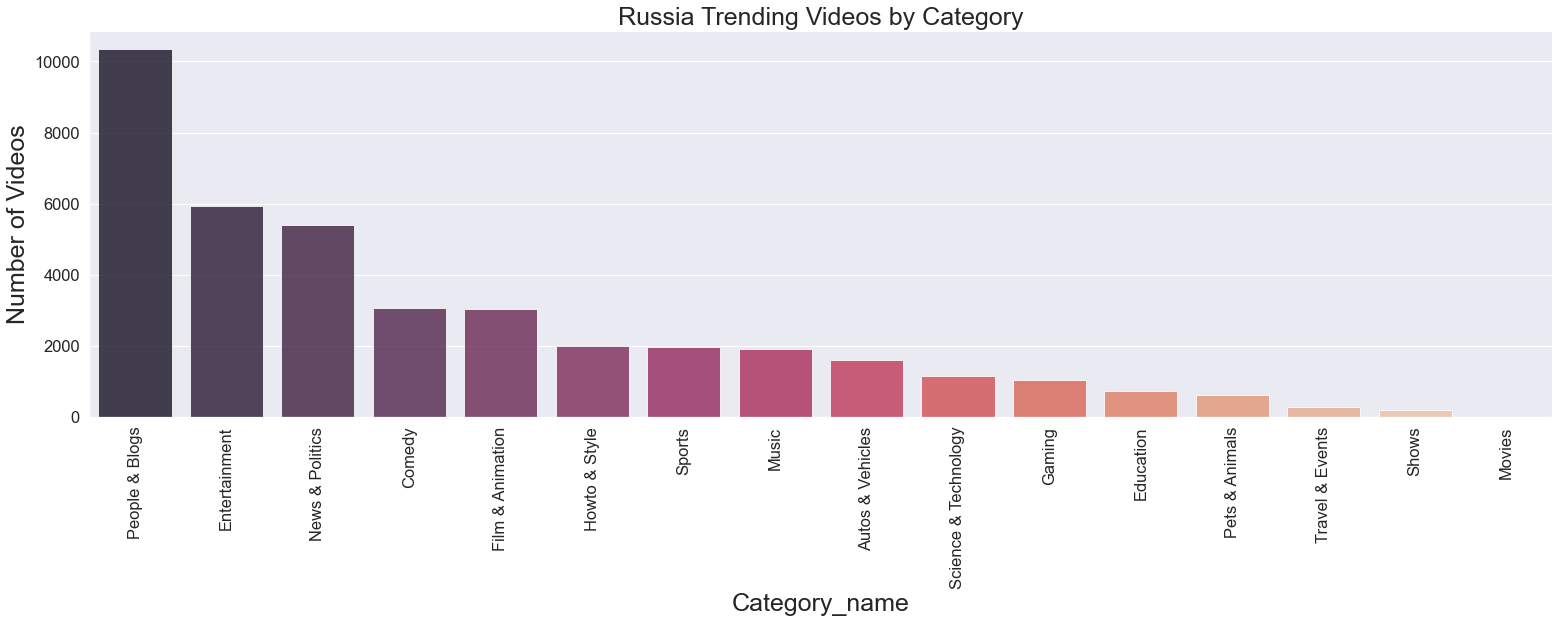

In [43]:
categories = df['Category_name'].value_counts()

# Bar graph for number of videos per category
plt.figure(figsize=(22,9))
sns.barplot(categories.index, categories.values, alpha=0.8, palette="rocket")
sns.set_style("darkgrid")
sns.set(font_scale=1.5)
plt.xticks(rotation=90)
plt.xlabel('Category_name', fontsize=25)
plt.ylabel('Number of Videos', fontsize=25)
plt.title('Russia Trending Videos by Category', fontsize=25)
plt.tight_layout()
plt.savefig('Images/ru_cat_graph.png')
plt.show()

### Video's Comments Disabled  PairPlot

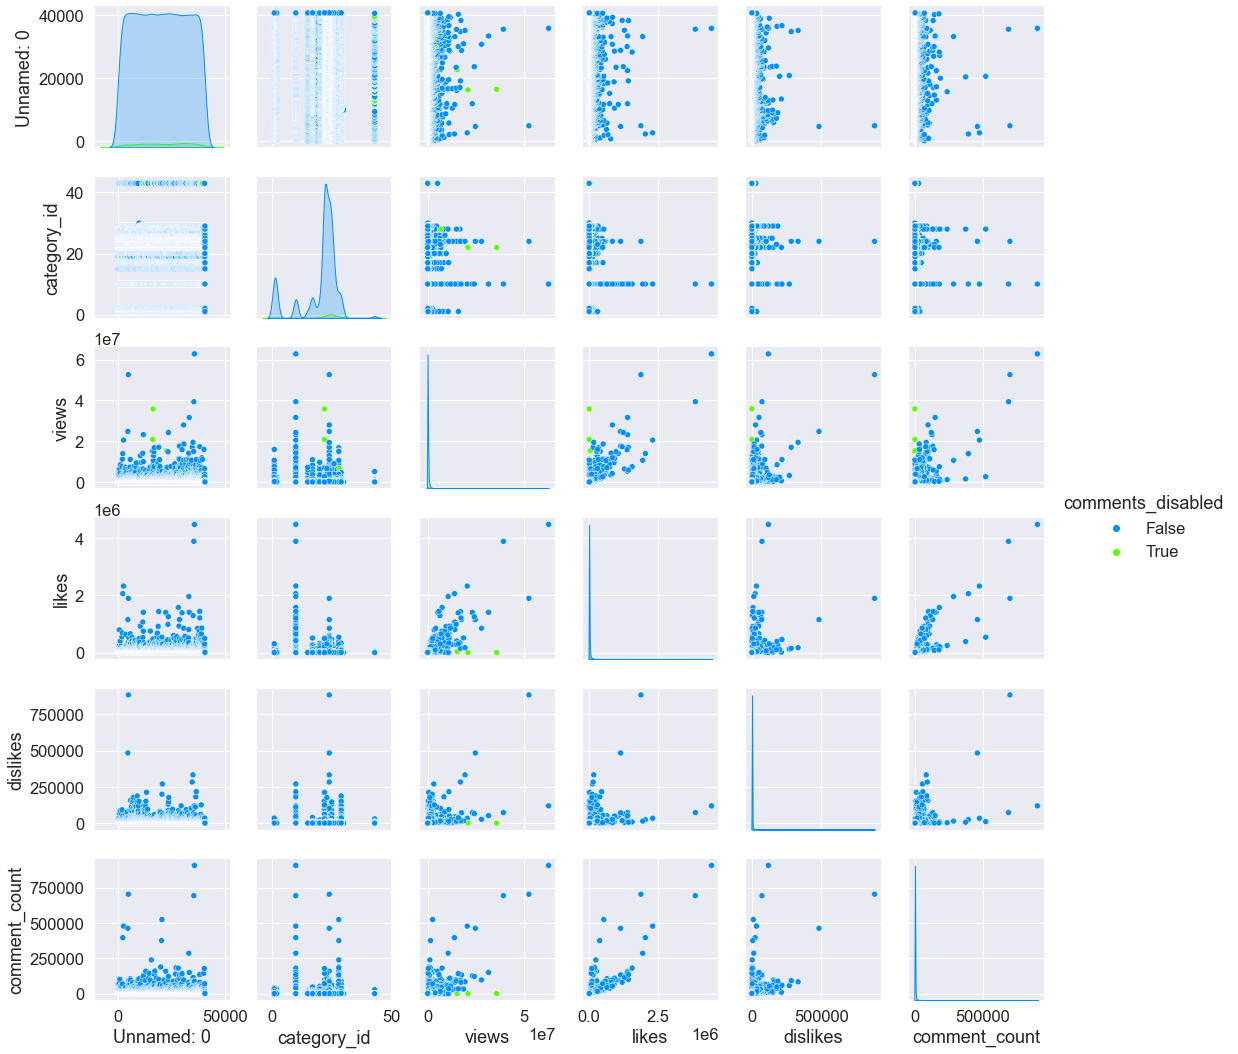

In [44]:
sns.pairplot(ru_df, hue = 'comments_disabled', palette = 'gist_rainbow_r')
plt.savefig('Images/ru_comment_graph.png')

In [45]:
value_counts = ru_df['channel_title'].value_counts().to_frame()
value_counts.head()

,channel_title
Анатолий Шарий,197
Эхо Москвы,184
Модные Практики с Паукште Ириной Михайловной,169
Wylsacom,167
kamikadzedead,159


### Save/Transfer Russia channel dataframe into a CSV file 

In [46]:
value_counts.to_csv('RU_Channel_Counts.csv')

### Save/Transfer clean & organized Russia dataframe into a CSV file

In [47]:
ru_df.to_csv('CleanRUVideos.csv')

## Reading Clean Russian Videos CSV

In [48]:
# read from an excel file
csv_file = "CleanRUVideos.csv"

ru_df = pd.read_csv(csv_file, sep=',', encoding='utf-8-sig')

ru_df.head()

,Unnamed: 0,Unnamed: 0.1,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled
0,0,0,17.14.11,Захар и Полина учатся экономить,Т—Ж БОГАЧ,22,2017-11-13T09:09:31.000Z,"захар и полина|""учимся экономить""|""копить день...",62408,334,190,50,False
1,1,1,17.14.11,Биржа Мемов #29. Большой выпуск,Druzhko Show,22,2017-11-13T17:32:11.000Z,"биржа мемов|""лев шагинян""|""мемы""|""пикчи""|""друж...",330043,43841,2244,2977,False
2,2,2,17.14.11,ХАЙП КЭМП - СВОЙ СРЕДИ ЧУЖИХ,Юлик,24,2017-11-13T16:11:31.000Z,"юмор|""комедия""|""влог""|""блог""|""смешно""|""смешное...",424596,49854,714,2944,False
3,3,3,17.14.11,Сочная кесадилья с курицей,Hochland,22,2017-11-13T06:51:10.000Z,"хохланд|""сыр""|""рецепты""|""как приготовить""|""вку...",112851,3566,122,80,False
4,4,4,17.14.11,КЛИПЫ РОДИТЕЛЕЙ НА ШКОЛЬНЫЙ ВЫПУСКНОЙ,Совергон,24,2017-11-13T16:52:36.000Z,"Совергон|""Sovergon""|""клипы""|""родители""|""школа""...",243469,36216,631,1692,False


### Checking Data Types Before Translation begins

In [49]:
ru_df.dtypes

Unnamed: 0            int64
Unnamed: 0.1          int64
trending_date        object
title                object
channel_title        object
category_id           int64
publish_time         object
tags                 object
views                 int64
likes                 int64
dislikes              int64
comment_count         int64
comments_disabled      bool
dtype: object

# 'Title' Translation:

In [51]:
#create new empty column for translated text
en_title = []

#set the count for missed translated to 0
miss = 0

# loop throu each element in title and append it

elements = ru_df["title"]

for i in range(200):
    
    element = elements[i]
    
    try:
        #before just printing the text, printed the whole list to see where the translated word is located
        #translated_text = translator.translate(element)
        translated_text = translator.translate(element)
        en_title.append(translated_text)
        print(f' \033[1m YouTube Title in RU: \033[0m {element} \033[1m Translation: \033[0m {translated_text}')
    
    except:
   
            miss+=1
        
            print("missed another",miss)

  YouTube Title in RU:  Захар и Полина учатся экономить  Translation:  Zakhar and Polina learn to save
  YouTube Title in RU:  Биржа Мемов #29. Большой выпуск  Translation:  Meme Exchange # 29. Big issue
  YouTube Title in RU:  ХАЙП КЭМП - СВОЙ СРЕДИ ЧУЖИХ  Translation:  HYIP CAMP - YOURSELF AMONG THE ALIEN
  YouTube Title in RU:  Сочная кесадилья с курицей  Translation:  Juicy quesadilla with chicken
  YouTube Title in RU:  КЛИПЫ РОДИТЕЛЕЙ НА ШКОЛЬНЫЙ ВЫПУСКНОЙ  Translation:  SCHOOL GRADUATION CLIPS OF PARENTS
  YouTube Title in RU:  АНОНС / Versus Fresh Blood 4: Война Стилей  Translation:  ANNOUNCEMENT / Versus Fresh Blood 4: War of Styles
  YouTube Title in RU:  ЗАМОРОЗКА ЧЕЛОВЕКА + 1 К БЕССМЕРТИЮ — ТОПЛЕС  Translation:  FREEZING A PERSON + 1 TO IMMORTALITY - TOPLES
  YouTube Title in RU:  РПЦ незаконно строит храм, полиция смотрит как бьют местных жителей  Translation:  The Russian Orthodox Church is illegally building a temple, the police watch as local residents are beaten
  You

In [281]:
ru_df['en_title'] = pd.Series(en_title)
ru_df.head()

,Unnamed: 0,Unnamed: 0.1,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,en_title
0,0,0,17.14.11,Захар и Полина учатся экономить,Т—Ж БОГАЧ,22,2017-11-13T09:09:31.000Z,"захар и полина|""учимся экономить""|""копить день...",62408,334,190,50,False,Zakhar and Polina learn to save
1,1,1,17.14.11,Биржа Мемов #29. Большой выпуск,Druzhko Show,22,2017-11-13T17:32:11.000Z,"биржа мемов|""лев шагинян""|""мемы""|""пикчи""|""друж...",330043,43841,2244,2977,False,Meme Exchange # 29.Big issue
2,2,2,17.14.11,ХАЙП КЭМП - СВОЙ СРЕДИ ЧУЖИХ,Юлик,24,2017-11-13T16:11:31.000Z,"юмор|""комедия""|""влог""|""блог""|""смешно""|""смешное...",424596,49854,714,2944,False,HYIP CAMP - YOUR OWN AMONG THE ALIEN
3,3,3,17.14.11,Сочная кесадилья с курицей,Hochland,22,2017-11-13T06:51:10.000Z,"хохланд|""сыр""|""рецепты""|""как приготовить""|""вку...",112851,3566,122,80,False,Juicy quesadilla with chicken
4,4,4,17.14.11,КЛИПЫ РОДИТЕЛЕЙ НА ШКОЛЬНЫЙ ВЫПУСКНОЙ,Совергон,24,2017-11-13T16:52:36.000Z,"Совергон|""Sovergon""|""клипы""|""родители""|""школа""...",243469,36216,631,1692,False,SCHOOL GRADUATION CLIPS OF PARENTS


In [282]:
type('title')

str

In [283]:
type(en_title)

list

# 'Channel_Title' Translation:

In [284]:
#create new empty column for translated text
en_channel_title = []

#set the count for missed translated to 0
miss = 0

# loop throu each element in title and append it

elements = ru_df["channel_title"]

for i in range(100):
    
    element = elements[i]
    
    try:
        translated_text = translator.translate(element).text
        en_channel_title.append(translated_text)
        print(f' \033[1m YouTube Channel Title in RU: \033[0m {element} \033[1m Translation: \033[0m {translated_text}')
    
    except:
   
            miss+=1
        
            print("missed another",miss)

  YouTube Channel Title in RU:  Т—Ж БОГАЧ  Translation:  T — F BOGACH
  YouTube Channel Title in RU:  Druzhko Show  Translation:  Dude Shosh
  YouTube Channel Title in RU:  Юлик  Translation:  Yulik
  YouTube Channel Title in RU:  Hochland  Translation:  Hochland
  YouTube Channel Title in RU:  Совергон  Translation:  Sovergon
  YouTube Channel Title in RU:  versusbattleru  Translation:  versusbattleru
  YouTube Channel Title in RU:  ТОПЛЕС  Translation:  TOPLESS
  YouTube Channel Title in RU:  Нет застройке без согласия  Translation:  No building without consent
  YouTube Channel Title in RU:  Итальянцы by Kuzno Productions  Translation:  Italians by Kuzno Productions
  YouTube Channel Title in RU:  Официальный канал КВН  Translation:  KVN official channel
  YouTube Channel Title in RU:  Анатолий Шарий  Translation:  Anatoly Shariy
  YouTube Channel Title in RU:  PEOPLETALK  Translation:  PEOPLETALK
  YouTube Channel Title in RU:  Канал Стинта :3  Translation:  Stint channel: 3
  YouT

In [285]:
ru_df['en_channel_title'] = pd.Series(en_channel_title)
ru_df.head(5)

,Unnamed: 0,Unnamed: 0.1,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,en_title,en_channel_title
0,0,0,17.14.11,Захар и Полина учатся экономить,Т—Ж БОГАЧ,22,2017-11-13T09:09:31.000Z,"захар и полина|""учимся экономить""|""копить день...",62408,334,190,50,False,Zakhar and Polina learn to save,T — F BOGACH
1,1,1,17.14.11,Биржа Мемов #29. Большой выпуск,Druzhko Show,22,2017-11-13T17:32:11.000Z,"биржа мемов|""лев шагинян""|""мемы""|""пикчи""|""друж...",330043,43841,2244,2977,False,Meme Exchange # 29.Big issue,Dude Shosh
2,2,2,17.14.11,ХАЙП КЭМП - СВОЙ СРЕДИ ЧУЖИХ,Юлик,24,2017-11-13T16:11:31.000Z,"юмор|""комедия""|""влог""|""блог""|""смешно""|""смешное...",424596,49854,714,2944,False,HYIP CAMP - YOUR OWN AMONG THE ALIEN,Yulik
3,3,3,17.14.11,Сочная кесадилья с курицей,Hochland,22,2017-11-13T06:51:10.000Z,"хохланд|""сыр""|""рецепты""|""как приготовить""|""вку...",112851,3566,122,80,False,Juicy quesadilla with chicken,Hochland
4,4,4,17.14.11,КЛИПЫ РОДИТЕЛЕЙ НА ШКОЛЬНЫЙ ВЫПУСКНОЙ,Совергон,24,2017-11-13T16:52:36.000Z,"Совергон|""Sovergon""|""клипы""|""родители""|""школа""...",243469,36216,631,1692,False,SCHOOL GRADUATION CLIPS OF PARENTS,Sovergon


In [286]:
# Fereshteh testing different dtypes for appending.
#ru_df['en_channel_title'] = pd.Series((en_channel_title), dtype =pd.StringDtype())

#ru_df['en_channel_title'] = pd.Series((en_channel_title), dtype ='float64')

#ru_df['en_channel_title'] = pd.Series((en_channel_title), dtype ='object')


# 'Tags' Translations

In [287]:
#create new empty column for translated text
en_channel_title = []

#set the count for missed translated to 0
miss = 0

# loop throu each element in title and append it

elements = ru_df["tags"]

for i in range(100):
    
    element = elements[i]
    
    try:
        translated_text = translator.translate(element).text
        en_tags.append(translated_text)
        print(f' \033[1m YouTube Channel Tags in RU: \033[0m {element} \033[1m  Translation: \033[0m {translated_text}')
 
    except:
   
            miss+=1
        
            print("missed another",miss)

  YouTube Channel Tags in RU:  захар и полина|"учимся экономить"|"копить деньги"|"экономь"|"мелкие траты"|"как экономить на еде"|"советы экономить"|"личный бюджет"|"при маленькой зарплате"|"свадьба"|"подготовка к свадьбе"|"гости на свадьбе"|"красивая свадьба"|"жизнь свадьба"   Translation:  Zakhar and Polina | "learning to save" | "saving money" | "saving" | "small spending" | "how to save on food" | "tips to save" | "personal budget" | "with a small salary" | "wedding" |"wedding preparation" | "wedding guests" | "beautiful wedding" | "wedding life"
  YouTube Channel Tags in RU:  биржа мемов|"лев шагинян"|"мемы"|"пикчи"|"дружко"|"дружко шоу"|"анонимус"|"борщ"|"ftp"|"мхк"|"на случай важных переговоров"|"аффлек"|"бэн аффлек"|"batman"|"бэтмен"|"трамп"   Translation:  meme exchange | "lev shaginyan" | "memes" | "picchi" | "friend" | "friend of the show" | "anonymous" | "borscht" | "ftp" | "mhk" | "in case of important negotiations" | "affleck"|" ben affleck "|" batman "|" batman "|" trump 

In [288]:
ru_df['en_tags'] = pd.Series((en_tags), dtype ='object')
ru_df.head(5)

,Unnamed: 0,Unnamed: 0.1,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,en_title,en_channel_title,en_tags
0,0,0,17.14.11,Захар и Полина учатся экономить,Т—Ж БОГАЧ,22,2017-11-13T09:09:31.000Z,"захар и полина|""учимся экономить""|""копить день...",62408,334,190,50,False,Zakhar and Polina learn to save,T — F BOGACH,"Zakhar and Polina | ""learning to save"" | ""savi..."
1,1,1,17.14.11,Биржа Мемов #29. Большой выпуск,Druzhko Show,22,2017-11-13T17:32:11.000Z,"биржа мемов|""лев шагинян""|""мемы""|""пикчи""|""друж...",330043,43841,2244,2977,False,Meme Exchange # 29.Big issue,Dude Shosh,"meme exchange | ""lev shaginyan"" | ""memes"" | ""p..."
2,2,2,17.14.11,ХАЙП КЭМП - СВОЙ СРЕДИ ЧУЖИХ,Юлик,24,2017-11-13T16:11:31.000Z,"юмор|""комедия""|""влог""|""блог""|""смешно""|""смешное...",424596,49854,714,2944,False,HYIP CAMP - YOUR OWN AMONG THE ALIEN,Yulik,"humor | ""comedy"" | ""vlog"" | ""blog"" | ""funny"" |..."
3,3,3,17.14.11,Сочная кесадилья с курицей,Hochland,22,2017-11-13T06:51:10.000Z,"хохланд|""сыр""|""рецепты""|""как приготовить""|""вку...",112851,3566,122,80,False,Juicy quesadilla with chicken,Hochland,"hochland | ""cheese"" | ""recipes"" | ""how to cook..."
4,4,4,17.14.11,КЛИПЫ РОДИТЕЛЕЙ НА ШКОЛЬНЫЙ ВЫПУСКНОЙ,Совергон,24,2017-11-13T16:52:36.000Z,"Совергон|""Sovergon""|""клипы""|""родители""|""школа""...",243469,36216,631,1692,False,SCHOOL GRADUATION CLIPS OF PARENTS,Sovergon,"Sovergon | ""Sovergon"" | ""Clips"" | ""Parents"" | ..."


## Cleaning Dataframe- removing extra column and moving translated columns around

In [291]:
#ru_df = ru_df.drop(['Unnamed: 0.1'], axis=1)

# Removing columns that are extra and unnecessary
unnamed_col = ru_df.pop('Unnamed: 0.1')


# switched translated columns spots
col_name="en_title"
first_col = ru_df.pop(col_name)
ru_df.insert(3, col_name, first_col)

col_name="en_channel_title"
first_col = ru_df.pop(col_name)
ru_df.insert(5, col_name, first_col)

col_name="en_tags"
first_col = ru_df.pop(col_name)
ru_df.insert(9, col_name, first_col)


In [292]:
ru_df.head()

,Unnamed: 0,trending_date,title,en_title,channel_title,en_channel_title,category_id,publish_time,tags,en_tags,views,likes,dislikes,comment_count,comments_disabled
0,0,17.14.11,Захар и Полина учатся экономить,Zakhar and Polina learn to save,Т—Ж БОГАЧ,T — F BOGACH,22,2017-11-13T09:09:31.000Z,"захар и полина|""учимся экономить""|""копить день...","Zakhar and Polina | ""learning to save"" | ""savi...",62408,334,190,50,False
1,1,17.14.11,Биржа Мемов #29. Большой выпуск,Meme Exchange # 29.Big issue,Druzhko Show,Dude Shosh,22,2017-11-13T17:32:11.000Z,"биржа мемов|""лев шагинян""|""мемы""|""пикчи""|""друж...","meme exchange | ""lev shaginyan"" | ""memes"" | ""p...",330043,43841,2244,2977,False
2,2,17.14.11,ХАЙП КЭМП - СВОЙ СРЕДИ ЧУЖИХ,HYIP CAMP - YOUR OWN AMONG THE ALIEN,Юлик,Yulik,24,2017-11-13T16:11:31.000Z,"юмор|""комедия""|""влог""|""блог""|""смешно""|""смешное...","humor | ""comedy"" | ""vlog"" | ""blog"" | ""funny"" |...",424596,49854,714,2944,False
3,3,17.14.11,Сочная кесадилья с курицей,Juicy quesadilla with chicken,Hochland,Hochland,22,2017-11-13T06:51:10.000Z,"хохланд|""сыр""|""рецепты""|""как приготовить""|""вку...","hochland | ""cheese"" | ""recipes"" | ""how to cook...",112851,3566,122,80,False
4,4,17.14.11,КЛИПЫ РОДИТЕЛЕЙ НА ШКОЛЬНЫЙ ВЫПУСКНОЙ,SCHOOL GRADUATION CLIPS OF PARENTS,Совергон,Sovergon,24,2017-11-13T16:52:36.000Z,"Совергон|""Sovergon""|""клипы""|""родители""|""школа""...","Sovergon | ""Sovergon"" | ""Clips"" | ""Parents"" | ...",243469,36216,631,1692,False


### Save/Transfer clean , organized & Translated Russia dataframe into a CSV file

In [293]:
# Save it to CSV
ru_df.to_csv('CleanTranRUVideos.csv')

---
## Data Cleaning and Translation DONE. Below steps were for our own curiosity
---

In [272]:
channels = politics['channel_title'].unique()
channels


array(['Известия Мордовии', 'КРУТОЕ ВИДЕО',
       'Вечер с Владимиром Соловьевым',
       'Новости Саранска и Мордовии Столица С', 'NewTV Kyrgyzstan',
       'Clear Russian Youtube', 'ARTPODGOTOVKA', 'Sasha Sotnik', 'Om TV',
       'Жалбырак ТВ', 'Россия', 'Документальные проекты. РЕН ТВ',
       'Время-вперёд!', 'Телеканал ЗВЕЗДА', 'Оштв Каналы', 'Вести FM',
       'Аренда, продажа склада', 'БАРМАЛЕЙКА', 'Радио Свобода',
       'Навальный LIVE', 'Ozodlik Radiosi', 'TRUST TV', '철영쿤 TV',
       'Эхо Москвы', 'novayagazeta', 'Станислав Желтковский',
       'Fontanka Ru', 'Сила Слова', 'MarsOne', 'Новости на Первом Канале',
       'NEWES RU', 'BBC Russian', 'БОЛЬШАЯ ПОЛИТИКА',
       'Best Chinese Vines', 'Кыргызча Медиа Портал', 'День ТВ',
       'Сергей Михеев', 'Dmitry Puchkov', 'Телеканал 360',
       'Движ-ПарижSHOW', 'НОВОСТИ HD', 'Ксения Собчак',
       'АПОКАЛИПСИС СЕГОДНЯ', 'chpSaratov', 'Валерия Кумпф',
       'Иван Наумов', 'Е. М. Реальная Оппозиция', 'SERIAL UZ', 'NewsOne',
 

In [263]:
politics = ru_df.loc[ru_df['category_id']==25]
politics.head()

,Unnamed: 0,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled
19,19,17.14.11,В Саранске обрушилась многоэтажка,Известия Мордовии,25,2017-11-13T11:55:37.000Z,"Саранск|""Мордовия""",46143,45,566,73,False
31,31,17.14.11,НАВАЛЬНЫЙ 2018:ОЛИГАРХИ ОБЪЯВИЛИ ЗАБАСТОВКУ!,КРУТОЕ ВИДЕО,25,2017-11-13T15:12:32.000Z,"путин|""медведев""|""греф""|""миллер""|""канал""|""воро...",66883,4731,497,942,False
37,37,17.14.11,Воскресный Вечер с Владимиром Соловьевым от 12...,Вечер с Владимиром Соловьевым,25,2017-11-13T02:49:37.000Z,"интервью|""кедми""|""сатановский""|""вопрос""|""общес...",159579,1352,403,661,False
52,52,17.14.11,В Саранске спасатели извлекли из-под завалов т...,Новости Саранска и Мордовии Столица С,25,2017-11-13T13:50:16.000Z,"СтолицаС|""Stolica""|""news""|""saransk""|""russia""|""...",4636,0,0,0,False
70,70,17.14.11,Жаш келинди бетон басып калды\NewTV,NewTV Kyrgyzstan,25,2017-11-13T14:43:45.000Z,[none],22254,118,40,87,False


In [264]:
politics_df = politics.sort_values(by='views', ascending=False)
politics_df.head()

,Unnamed: 0,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled
16340,16340,18.05.02,LOGAN PAUL RETURNS 📰 PEW NEWS📰,PewDiePie,25,2018-02-03T19:15:57.000Z,"pewdiepie|""pew""|""news""",6975564,475273,17506,61122,False
26850,26850,18.30.03,Дети сгорели заживо в запертом кинозале в Кеме...,ВОТ ТАК,25,2018-03-26T17:46:18.000Z,"Кемерово|""Пожар в Кемерово""|""Зимняя вишня""|""То...",6934190,47700,9504,22888,False
36055,36055,18.21.05,Watch live: The royal wedding of Prince Harry ...,Washington Post,25,2018-05-19T14:26:17.000Z,"breaking news video|""video updates""|""live vide...",6389898,37900,4972,2684,False
26552,26552,18.29.03,Дети сгорели заживо в запертом кинозале в Кеме...,ВОТ ТАК,25,2018-03-26T17:46:18.000Z,"Кемерово|""Пожар в Кемерово""|""Зимняя вишня""|""То...",6269661,44768,8791,21607,False
35813,35813,18.20.05,Watch live: The royal wedding of Prince Harry ...,Washington Post,25,2018-05-19T14:26:17.000Z,"breaking news video|""video updates""|""live vide...",5943011,35523,4268,2268,False


In [266]:
pdp_news = politics_df.loc[politics_df['channel_title']=='PewDiePie']
pdp_news

,Unnamed: 0,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled
16340,16340,18.05.02,LOGAN PAUL RETURNS 📰 PEW NEWS📰,PewDiePie,25,2018-02-03T19:15:57.000Z,"pewdiepie|""pew""|""news""",6975564,475273,17506,61122,False
16021,16021,18.04.02,LOGAN PAUL RETURNS 📰 PEW NEWS📰,PewDiePie,25,2018-02-03T19:15:57.000Z,"pewdiepie|""pew""|""news""",4132424,338321,10249,43904,False


In [267]:
cnn_news = politics_df.loc[politics_df['channel_title']=='CNN']
cnn_news

,Unnamed: 0,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled
16771,16771,18.07.02,SpaceX launches world's most powerful rocket,CNN,25,2018-02-06T21:12:23.000Z,"latest News|""Happening Now""|""CNN""|""spacex""|""el...",484383,5186,288,2244,False


In [268]:
wp_news = politics_df.loc[politics_df['channel_title']=='Washington Post']
wp_news

,Unnamed: 0,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled
36055,36055,18.21.05,Watch live: The royal wedding of Prince Harry ...,Washington Post,25,2018-05-19T14:26:17.000Z,"breaking news video|""video updates""|""live vide...",6389898,37900,4972,2684,False
35813,35813,18.20.05,Watch live: The royal wedding of Prince Harry ...,Washington Post,25,2018-05-19T14:26:17.000Z,"breaking news video|""video updates""|""live vide...",5943011,35523,4268,2268,False


In [269]:
cnn_top = cnn_news['title'].unique()
cnn_top

array(["SpaceX launches world's most powerful rocket"], dtype=object)

In [270]:
wp_top = wp_news['title'].unique()
wp_top

array(['Watch live: The royal wedding of Prince Harry and Meghan Markle'],
      dtype=object)

In [271]:
pdp_top = pdp_news['title'].unique()
pdp_top

array(['LOGAN PAUL RETURNS  📰 PEW NEWS📰'], dtype=object)

In [52]:
from translate import Translator
translator= Translator(from_lang="russian",to_lang="english")
translation = translator.translate("ХАЙП КЭМП - СВОЙ СРЕДИ ЧУЖИХ")
print (translation)

MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE TRANSLATIONS FOR TODAY. NEXT AVAILABLE IN  20 HOURS 56 MINUTES 46 SECONDSVISIT HTTPS://MYMEMORY.TRANSLATED.NET/DOC/USAGELIMITS.PHP TO TRANSLATE MORE
